# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

plt.style.use("ggplot")
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("Crime_Reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333699 entries, 0 to 2333698
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 166
Occurred Date                        0
Occurred Time                       85
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21079
Address                             12
Zip Code                         14470
Council District                 47540
APD Sector                        9212
APD District                      9697
PRA                              10986
Census Tract                    508588
Clearance Status                610285
Clearance Date                  341091
UCR Category                   1536394
Category Description           1536394
X-coordinate                     10388
Y-coordinate                     10388
Latitude                         39523
Longitude                

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20191571574,FRAUD - OTHER,1199,N,06/03/2019 04:00:00 PM,06/03/2019,1600.0,06/06/2019 05:34:00 PM,06/06/2019,1734.0,DEPARTMENT / DISCOUNT STORE,10817 BALLARD PATH,78717.0,6.0,AD,5,573.0,203.11,NaN,NaN,NaN,NaN,3097785.0,3097785.0,30.483646,-97.789495,"(30.48364631, -97.7894953)"
1,20191550153,DEADLY CONDUCT,408,N,06/04/2019 03:12:00 AM,06/04/2019,312.0,06/04/2019 03:16:00 AM,06/04/2019,316.0,RESIDENCE / HOME,8312 N IH 35 SVRD SB,78753.0,4.0,ED,1,250.0,18.06,N,06/06/2019,13A,Aggravated Assault,3128227.0,3128227.0,30.346646,-97.696573,"(30.34664576, -97.69657342)"
2,20195022816,THEFT OF LICENSE PLATE,614,N,06/03/2019 03:00:00 PM,06/03/2019,1500.0,06/04/2019 03:22:00 PM,06/04/2019,1522.0,RESIDENCE / HOME,6312 LIBYAN DR,78745.0,2.0,FR,4,509.0,24.09,N,06/04/2019,23G,Theft,3098393.0,3098393.0,30.205267,-97.794900,"(30.20526729, -97.79490043)"
3,20205007833,RUNAWAY CHILD,4100,N,02/22/2020 06:00:00 PM,02/22/2020,1800.0,02/24/2020 06:03:00 PM,02/24/2020,1803.0,RESIDENCE / HOME,13012 DEARBONNE DR,78617.0,2.0,HE,7,612.0,NaN,N,03/03/2020,NaN,NaN,3155456.0,3155456.0,30.176140,-97.615031,"(30.17613952, -97.6150307)"
4,20191671388,BURGLARY OF RESIDENCE,500,N,06/14/2019 12:00:00 PM,06/14/2019,1200.0,06/16/2019 10:00:00 PM,06/16/2019,2200.0,RESIDENCE / HOME,3809 SPICEWOOD SPRINGS RD EB,78731.0,10.0,BA,8,256.0,17.51,N,09/18/2019,220,Burglary,3111039.0,3111039.0,30.364987,-97.750587,"(30.36498691, -97.75058749)"


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2333694,20143631822,FAMILY DISTURBANCE,3400,N,12/29/2014 11:41:00 PM,12/29/2014,2341.0,12/29/2014 11:41:00 PM,12/29/2014,2341.0,RESIDENCE / HOME,109 MASTERSON PASS,78753.0,4.0,ED,1,240,18.23,N,01/02/2015,NaN,NaN,3130776.0,3130776.0,30.369795,-97.687855,"(30.36979494, -97.68785533)"
2333695,20191270738,THEFT BY SHOPLIFTING,607,N,05/07/2019 10:50:00 AM,05/07/2019,1050.0,05/07/2019 11:31:00 AM,05/07/2019,1131.0,DEPARTMENT / DISCOUNT STORE,11423 N LAMAR BLVD,78753.0,7.0,ED,4,221,18.24,NaN,NaN,23C,Theft,3131578.0,3131578.0,30.383630,-97.684932,"(30.38362955, -97.68493154)"
2333696,2008501470,CRIMINAL TRESPASS/TRANSIENT,2721,N,02/19/2008 05:00:00 PM,02/19/2008,1700.0,02/19/2008 05:00:00 PM,02/19/2008,1700.0,PARKING LOTS / GARAGE,6800 BERKMAN DR,78723.0,1.0,ID,5,293,21.00,NaN,NaN,NaN,NaN,3130390.0,3130390.0,30.320281,-97.690437,"(30.32028083, -97.6904366)"
2333697,2003921400113,DWI,2100,N,05/20/2003 01:32:00 AM,05/20/2003,132.0,05/20/2003 01:32:00 AM,05/20/2003,132.0,STREETS / HWY / ROAD / ALLEY,4500 N MOPAC EXPY NB,78731.0,10.0,BA,6,325,1.00,C,05/22/2003,NaN,NaN,3109748.0,3109748.0,30.320565,-97.755869,"(30.32056515, -97.7558693)"
2333698,20081340129,URINATING IN PUBLIC PLACE,3212,N,05/13/2008 01:10:00 AM,05/13/2008,110.0,05/13/2008 01:10:00 AM,05/13/2008,110.0,STREETS / HWY / ROAD / ALLEY,400 BLOCK E 6TH ST,78701.0,9.0,GE,2,382,11.00,C,05/17/2008,NaN,NaN,3115491.0,3115491.0,30.267351,-97.739093,"(30.26735144, -97.73909331)"


## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
def clean_data(df):
    drop_col = [
        "Highest Offense Code",
        "Incident Number",
        "Occurred Time",
        "Occurred Date",
        "Report Date",
        "Report Time",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "pra",
        "census_tract",
        "location_type",
        "apd_district",
        "apd_sector",
        "clearance_status",
        "ucr_category",
        "category_description",
    ]
    df[fillna].fillna("Unknown", inplace=True)

    date_col = ["occurred_date_time", "report_date_time", "clearance_date"]

    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "pra",
        "census_tract",
        "ucr_category",
        "category_description",
    ]

    df.family_violence = df.family_violence.replace({"Y": "True", "N": "False"})
    df.clearance_status = df.clearance_status.replace(
        {"C": "Cleared", "O": "Cleared", "N": "Not Cleared"}
    )

    df[cat_col] = df[cat_col].astype("category")

    df[date_col] = df[date_col].astype("datetime64")

    df["year"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.day
    df["hour"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.hour

    df.set_index(["occurred_date_time"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [5]:
df.duplicated().sum()

696

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
# Re-examining the dataframe
display(df.info())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2333003 entries, 2003-01-01 00:00:00 to NaT
Data columns (total 22 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   pra                          category      
 10  census_tract                 category      
 11  clearance_status             object        
 12  clearance_date               datetime64[ns]
 13  ucr_category                 category      
 14  category_description         category      
 15  latitude                     flo

None

,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,pra,census_tract,clearance_status,clearance_date,ucr_category,category_description,latitude,longitude,year,month,week,day,hour
occurred_date_time,,,,,,,,,,,,,,,,,,,,,,
2003-01-01,IDENTITY THEFT,False,2013-03-11 17:28:00,RESIDENCE / HOME,7001 S CONGRESS AVE,78745.0,2.0,FR,3,528.0,24.22,Not Cleared,2013-03-12,NaN,NaN,30.188878,-97.780075,2003.0,1.0,1.0,1.0,0.0
2003-01-01,IDENTITY THEFT,False,2008-05-10 18:36:00,RESIDENCE / HOME,7312 WHISPERING OAKS DR,78745.0,5.0,FR,1,525.0,NaN,NaN,2008-05-13,NaN,NaN,30.202175,-97.817542,2003.0,1.0,1.0,1.0,0.0
2003-01-01,IDENTITY THEFT,False,2003-10-06 10:52:00,RESIDENCE / HOME,5708 WHITEBROOK DR,78724.0,1.0,CH,7,300.0,22.00,NaN,2003-10-31,NaN,NaN,30.305744,-97.655117,2003.0,1.0,1.0,1.0,0.0
2003-01-01,SEXUAL ASSAULT OF CHILD/OBJECT,False,2005-03-31 16:40:00,RESIDENCE / HOME,6600 BLOCK ED BLUESTEIN BLVD,78723.0,NaN,ED,3,299.0,2201.00,Cleared,2005-07-12,11C,Rape,NaN,NaN,2003.0,1.0,1.0,1.0,0.0
2003-01-01,AGG SEXUAL ASSAULT CHILD/OBJEC,False,2008-09-17 11:43:00,RESIDENCE / HOME,2500 BLOCK S CONGRESS AVE,78704.0,3.0,DA,2,479.0,23.00,Not Cleared,2008-10-27,11C,Rape,NaN,NaN,2003.0,1.0,1.0,1.0,0.0


,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,pra,census_tract,clearance_status,clearance_date,ucr_category,category_description,latitude,longitude,year,month,week,day,hour
occurred_date_time,,,,,,,,,,,,,,,,,,,,,,
NaT,SUSPICIOUS PERSON,False,2005-05-24 20:14:00,NaN,8200 GEORGIAN DR,78753.0,4.0,ED,1,250.0,18.00,Not Cleared,2005-06-28,NaN,NaN,30.347657,-97.703221,NaN,NaN,NaN,NaN,NaN
NaT,SUSPICIOUS PERSON,False,2008-01-11 10:33:00,NaN,SAN JACINTO BLVD / E 4TH ST,78701.0,9.0,GE,2,381.0,11.00,NaN,2008-01-16,NaN,NaN,30.265527,-97.741069,NaN,NaN,NaN,NaN,NaN
NaT,POSS CONTROLLED SUB/NARCOTIC,False,2007-04-04 18:39:00,NaN,1511 FARO DR,78741.0,3.0,HE,3,442.0,23.17,Not Cleared,2007-07-25,NaN,NaN,30.235041,-97.713595,NaN,NaN,NaN,NaN,NaN
NaT,RUNAWAY CHILD,False,2004-02-24 22:55:00,NaN,400 W LIVE OAK ST,78704.0,9.0,DA,1,476.0,13.00,Not Cleared,2004-02-25,NaN,NaN,30.243872,-97.755879,NaN,NaN,NaN,NaN,NaN
NaT,BURGLARY OF VEHICLE,False,2003-05-06 10:47:00,RESIDENCE / HOME,1908 SAN ANTONIO ST,78705.0,9.0,BA,1,359.0,6.00,Not Cleared,NaT,23F,Theft,30.282945,-97.743406,NaN,NaN,NaN,NaN,NaN


In [28]:
df.category_description.value_counts()

Theft                 566312
Burglary              116560
Auto Theft             44412
Aggravated Assault     35313
Robbery                20297
Rape                   13491
Murder                   539
Name: category_description, dtype: int64

## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

,zip_code
78741.0,209055
78753.0,181337
78701.0,170054
78758.0,161813
78704.0,156602
78745.0,152800
78702.0,138013
78744.0,127911
78723.0,119944
78752.0,85519


,zip_code
78741.0,0.090167
78753.0,0.078212
78701.0,0.073345
78758.0,0.069791
78704.0,0.067543
78745.0,0.065904
78702.0,0.059526
78744.0,0.055169
78723.0,0.051733
78752.0,0.036885


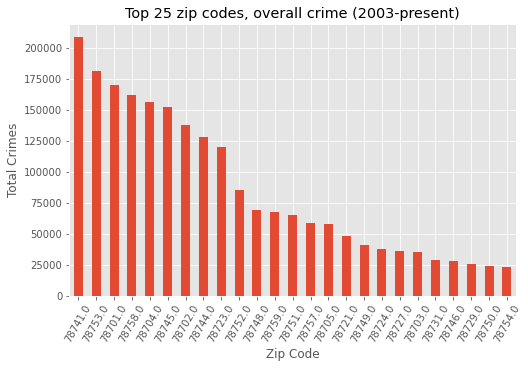

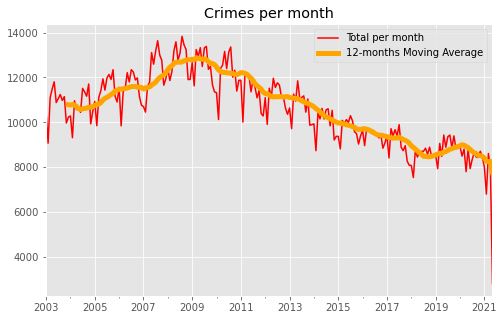

In [8]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25).to_frame())
display(df.zip_code.value_counts(normalize=True).head(25).to_frame())

# Visualizing the top 25 crime-ridden zip codes in Austin
df.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes, overall crime (2003-present)",
    figsize=(8, 5),
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(figsize=(8, 5))
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange", linewidth=5, label="12-months Moving Average"
)
plt.title("Crimes per month")
plt.xlabel("")
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

,highest_offense_description
BURGLARY OF VEHICLE,232390
THEFT,213553
FAMILY DISTURBANCE,182537
CRIMINAL MISCHIEF,128954
ASSAULT W/INJURY-FAM/DATE VIOL,78959
BURGLARY OF RESIDENCE,77598
DWI,70113
PUBLIC INTOXICATION,68978
HARASSMENT,64936
DISTURBANCE - OTHER,62331


,BURGLARY OF VEHICLE,CRIMINAL MISCHIEF,HARASSMENT,BURGLARY OF RESIDENCE,ASSAULT W/INJURY-FAM/DATE VIOL,PUBLIC INTOXICATION,DWI,FAMILY DISTURBANCE,TOTAL
occurred_date_time,,,,,,,,,
2003-01-31,1225,722,293,328,349,341,408,505,4171
2003-02-28,1110,594,309,248,342,354,328,500,3785
2003-03-31,1222,700,363,393,421,450,406,546,4501
2003-04-30,1396,709,353,398,432,385,375,678,4726
2003-05-31,1487,750,345,436,424,451,418,650,4961
...,...,...,...,...,...,...,...,...,...
2021-01-31,360,432,256,128,256,55,169,815,2471
2021-02-28,308,338,167,118,245,62,130,812,2180
2021-03-31,432,429,193,154,259,75,179,876,2597


<Figure size 432x288 with 0 Axes>

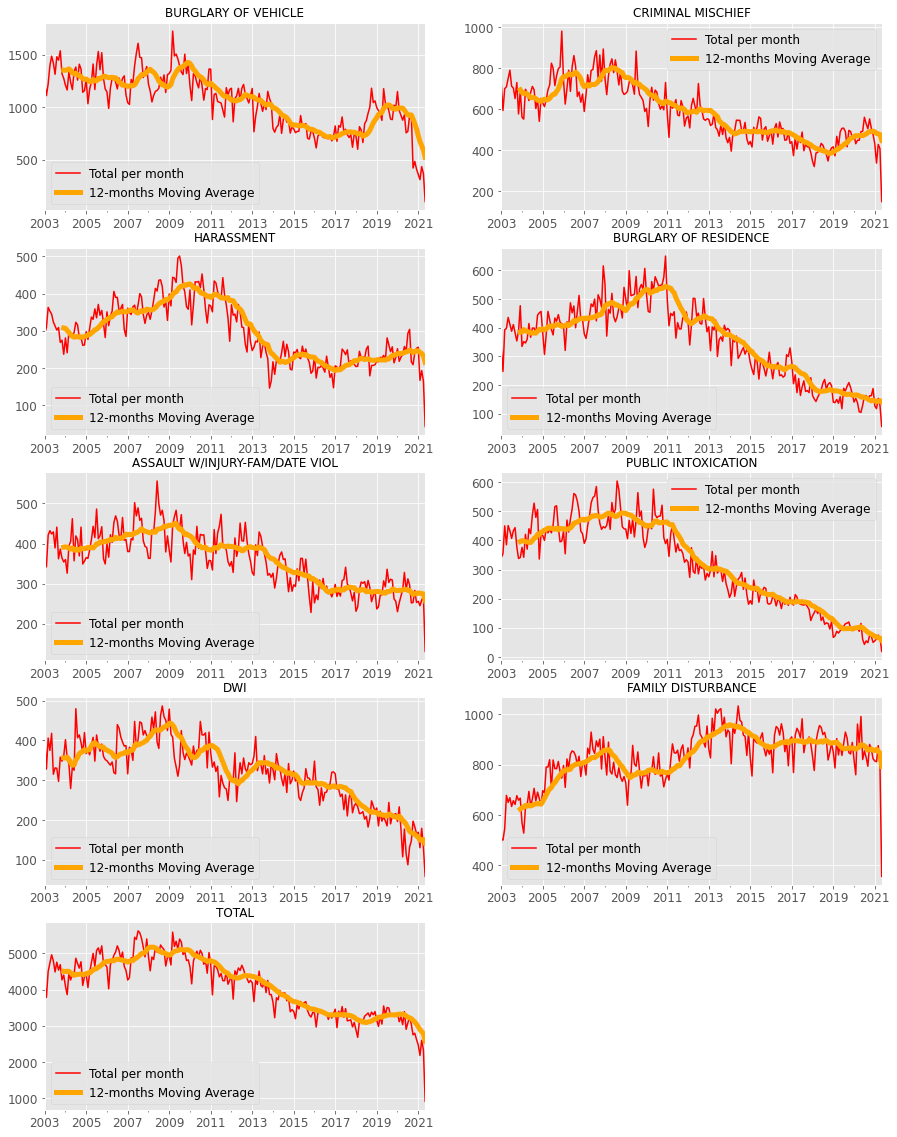

In [9]:
display(df["highest_offense_description"].value_counts().head(10).to_frame())

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly)

plt.figure(1)
plt.figure(figsize=(15, 20))

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

,highest_offense_description
PUBLIC INTOXICATION,17200
THEFT,15941
BURGLARY OF VEHICLE,9329
WARRANT ARREST NON TRAFFIC,8968
DWI,8354
ASSAULT WITH INJURY,7628
VIOL CITY ORDINANCE - OTHER,6192
POSS OF DRUG PARAPHERNALIA,6088
CRIMINAL MISCHIEF,5910
CRIMINAL TRESPASS,3954


,highest_offense_description
PUBLIC INTOXICATION,0.101144
THEFT,0.093741
BURGLARY OF VEHICLE,0.054859
WARRANT ARREST NON TRAFFIC,0.052736
DWI,0.049126
ASSAULT WITH INJURY,0.044856
VIOL CITY ORDINANCE - OTHER,0.036412
POSS OF DRUG PARAPHERNALIA,0.035800
CRIMINAL MISCHIEF,0.034754
CRIMINAL TRESPASS,0.023251


<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

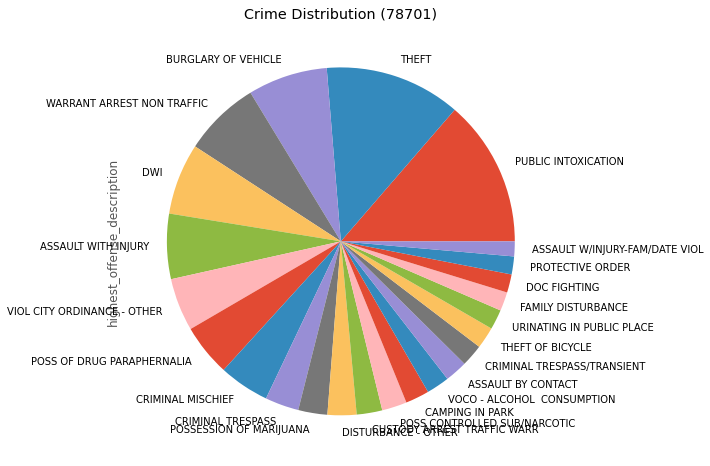

In [10]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off.to_frame())
display(df_01.highest_offense_description.value_counts(normalize=True).head(24).to_frame())
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

,highest_offense_description
THEFT,17270
BURGLARY OF VEHICLE,16022
FAMILY DISTURBANCE,14899
CRIMINAL MISCHIEF,9563
THEFT BY SHOPLIFTING,7697
ASSAULT W/INJURY-FAM/DATE VIOL,7260
BURGLARY OF RESIDENCE,6114
DWI,5086
DISTURBANCE - OTHER,4826
CUSTODY ARREST TRAFFIC WARR,4352


----------------------------------


,highest_offense_description
THEFT,0.095237
BURGLARY OF VEHICLE,0.088355
FAMILY DISTURBANCE,0.082162
CRIMINAL MISCHIEF,0.052736
THEFT BY SHOPLIFTING,0.042446
ASSAULT W/INJURY-FAM/DATE VIOL,0.040036
BURGLARY OF RESIDENCE,0.033716
DWI,0.028047
DISTURBANCE - OTHER,0.026613
CUSTODY ARREST TRAFFIC WARR,0.024000


<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

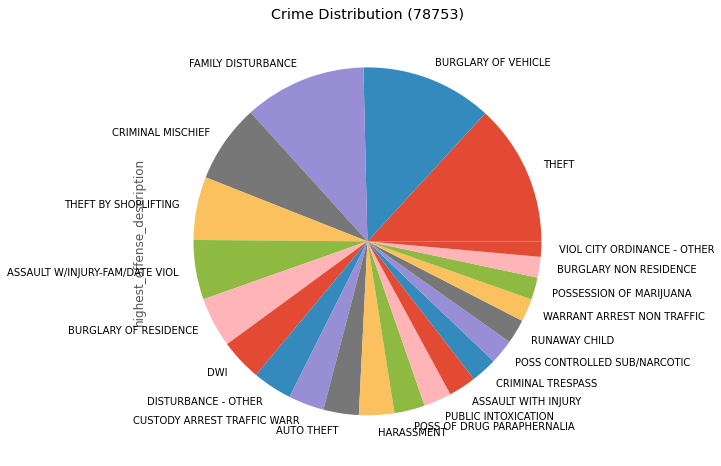

In [11]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_53_off.to_frame())
print("----------------------------------")
display(df_53.highest_offense_description.value_counts(normalize=True).head(22).to_frame())
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

,highest_offense_description
FAMILY DISTURBANCE,20627
BURGLARY OF VEHICLE,19919
THEFT,15724
CRIMINAL MISCHIEF,11141
ASSAULT W/INJURY-FAM/DATE VIOL,9706
BURGLARY OF RESIDENCE,8926
PUBLIC INTOXICATION,6400
CUSTODY ARREST TRAFFIC WARR,6011
DWI,5700
HARASSMENT,5587


----------------------------------


,highest_offense_description
FAMILY DISTURBANCE,0.098668
BURGLARY OF VEHICLE,0.095281
THEFT,0.075215
CRIMINAL MISCHIEF,0.053292
ASSAULT W/INJURY-FAM/DATE VIOL,0.046428
BURGLARY OF RESIDENCE,0.042697
PUBLIC INTOXICATION,0.030614
CUSTODY ARREST TRAFFIC WARR,0.028753
DWI,0.027266
HARASSMENT,0.026725


<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

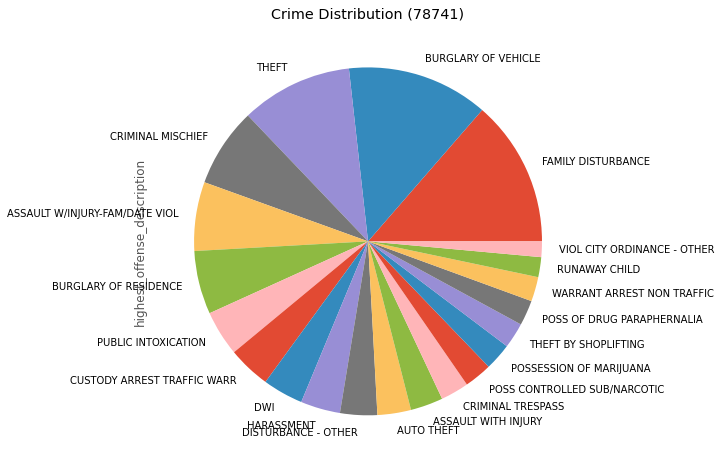

In [12]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
display(df_41_off.to_frame())
print("----------------------------------")
display(df_41.highest_offense_description.value_counts(normalize=True).head(21).to_frame())
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

,highest_offense_description
FAMILY DISTURBANCE,15176
BURGLARY OF VEHICLE,14794
THEFT,13664
CRIMINAL MISCHIEF,8615
BURGLARY OF RESIDENCE,5891
ASSAULT W/INJURY-FAM/DATE VIOL,5811
HARASSMENT,5179
DISTURBANCE - OTHER,4575
DWI,4450
PUBLIC INTOXICATION,4010


----------------------------------


,highest_offense_description
FAMILY DISTURBANCE,0.099319
BURGLARY OF VEHICLE,0.096819
THEFT,0.089424
CRIMINAL MISCHIEF,0.056381
BURGLARY OF RESIDENCE,0.038554
ASSAULT W/INJURY-FAM/DATE VIOL,0.038030
HARASSMENT,0.033894
DISTURBANCE - OTHER,0.029941
DWI,0.029123
PUBLIC INTOXICATION,0.026243


<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

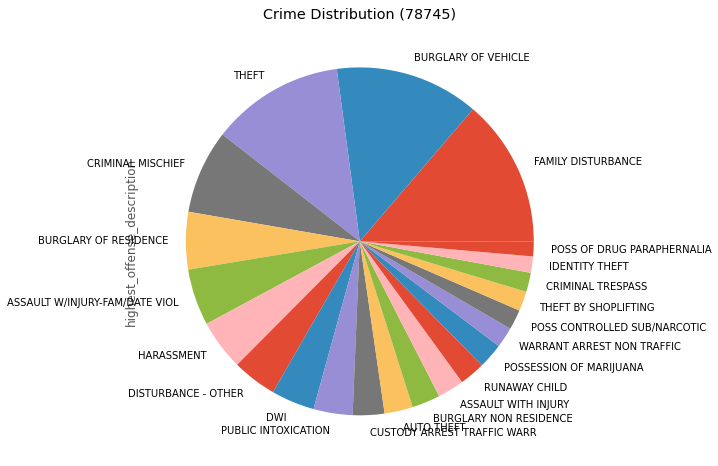

In [13]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
display(df_45_off.to_frame())
print("----------------------------------")
display(df_45.highest_offense_description.value_counts(normalize=True).head(22).to_frame())
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

,highest_offense_description
BURGLARY OF VEHICLE,8696
THEFT,5657
CRIMINAL MISCHIEF,5006
THEFT OF BICYCLE,3530
PUBLIC INTOXICATION,2633
BURGLARY OF RESIDENCE,2133
WARRANT ARREST NON TRAFFIC,1551
CRIMINAL TRESPASS,1370
AUTO THEFT,1363
ASSAULT WITH INJURY,1274


'----------------------------------'

,highest_offense_description
BURGLARY OF VEHICLE,0.150190
THEFT,0.097703
CRIMINAL MISCHIEF,0.086459
THEFT OF BICYCLE,0.060967
PUBLIC INTOXICATION,0.045475
BURGLARY OF RESIDENCE,0.036839
WARRANT ARREST NON TRAFFIC,0.026788
CRIMINAL TRESPASS,0.023661
AUTO THEFT,0.023541
ASSAULT WITH INJURY,0.022003


<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

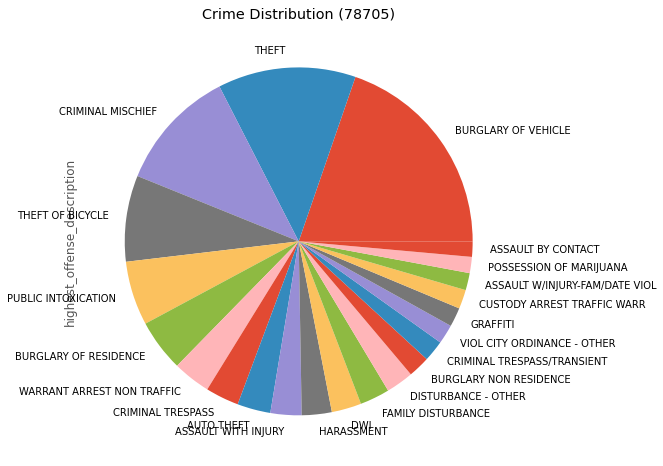

In [14]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off.to_frame())
display("----------------------------------")
display(df_05.highest_offense_description.value_counts(normalize=True).head(22).to_frame())
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

,highest_offense_description
BURGLARY OF VEHICLE,5430
THEFT,5110
THEFT BY SHOPLIFTING,2560
CRIMINAL MISCHIEF,1279
DWI,886
FAMILY DISTURBANCE,775
VIOL CITY ORDINANCE - OTHER,652
HARASSMENT,636
AUTO THEFT,612
BURGLARY OF RESIDENCE,524


,highest_offense_description
BURGLARY OF VEHICLE,0.190908
THEFT,0.179658
THEFT BY SHOPLIFTING,0.090005
CRIMINAL MISCHIEF,0.044967
DWI,0.031150
FAMILY DISTURBANCE,0.027247
VIOL CITY ORDINANCE - OTHER,0.022923
HARASSMENT,0.022361
AUTO THEFT,0.021517
BURGLARY OF RESIDENCE,0.018423


<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

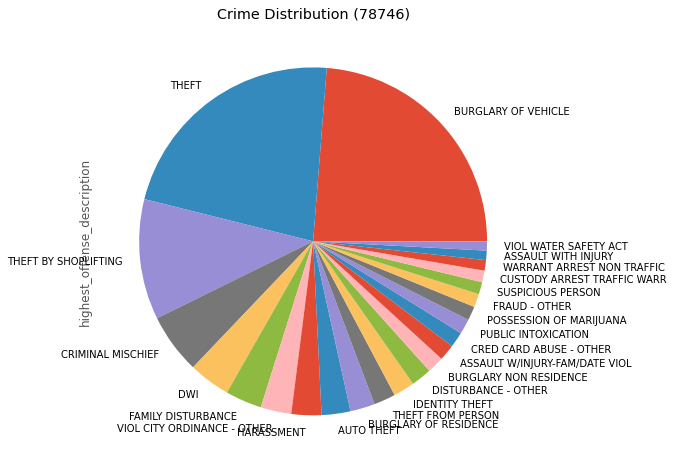

In [15]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off.to_frame())
display(df_46.highest_offense_description.value_counts(normalize=True).head(24).to_frame())
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed? 

In [16]:
# Creating separate dataframes for violent crime & murder rates

"""First, I wanted to update the naming of the offense types to make everything more presentable, 
including combining 'CAPITAL MURDER' with 'MURDER'."""

df.highest_offense_description = df.highest_offense_description.replace(
    {
        "CAPITAL MURDER": "MURDER",
        "AGG ROBBERY/DEADLY WEAPON": "ARMED ROBBERY",
        "AGG ASSAULT": "AGGRAVATED ASSAULT",
    }
)

df_viol = df.query(
    'highest_offense_description == ["AGGRAVATED ASSAULT", "ARMED ROBBERY", "RAPE", "MURDER"]'
)
df_viol_mur = df_viol[df_viol.highest_offense_description == "MURDER"]
df_agg_asslt = df_viol[df_viol.highest_offense_description == "AGGRAVATED ASSAULT"]
df_agg_robbery = df_viol[df_viol.highest_offense_description == "ARMED ROBBERY"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]
df_21 = df[df.year == 2021]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]
df_viol_21 = df_viol[df_viol.year == 2021]

# Annual murders
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]
df_viol_mur_21 = df_viol_mur[df_viol_mur.year == 2021]

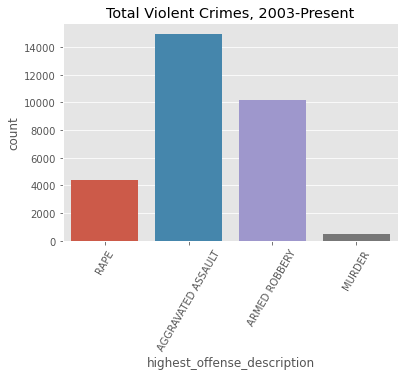

78741.0    0.130681
78753.0    0.099133
78758.0    0.094645
78701.0    0.074919
78723.0    0.074082
78702.0    0.073780
78745.0    0.057805
78752.0    0.052346
78744.0    0.051810
78704.0    0.048160
78721.0    0.027898
78724.0    0.024415
78705.0    0.021635
78757.0    0.020630
78748.0    0.017415
78751.0    0.017047
78759.0    0.013899
78722.0    0.009411
78754.0    0.008507
78727.0    0.007937
78749.0    0.007770
78617.0    0.007669
78729.0    0.007234
78750.0    0.005660
78731.0    0.005191
Name: zip_code, dtype: float64

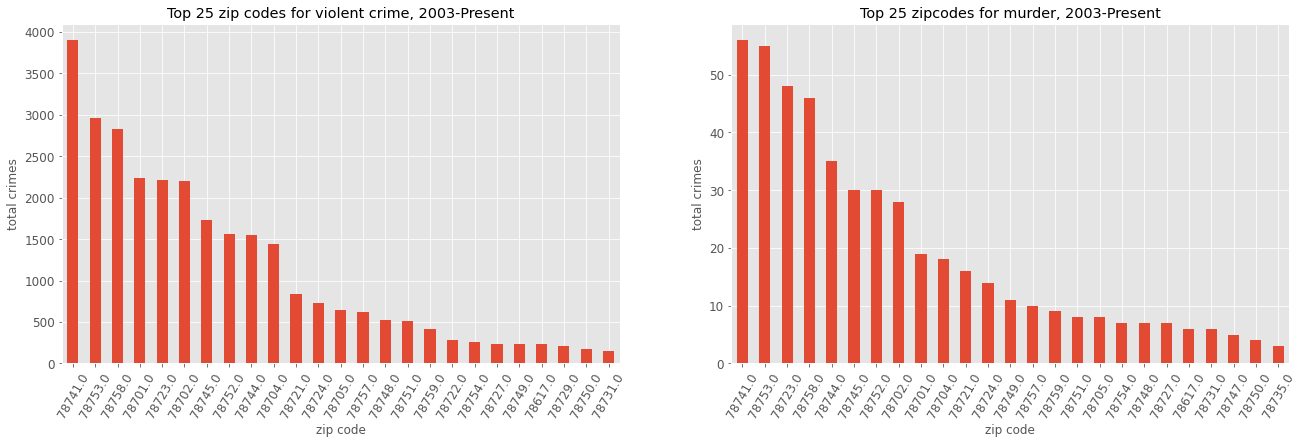

highest_offense_description,AGGRAVATED ASSAULT,ARMED ROBBERY,MURDER,RAPE
zip_code,,,,
78610.0,1,0,0,1
78613.0,15,11,1,7
78617.0,124,62,6,37
78621.0,1,0,0,0
78634.0,1,0,0,0
78652.0,3,0,0,0
78653.0,10,3,1,1
78660.0,65,31,2,19
78664.0,3,0,0,0


<Figure size 432x288 with 0 Axes>

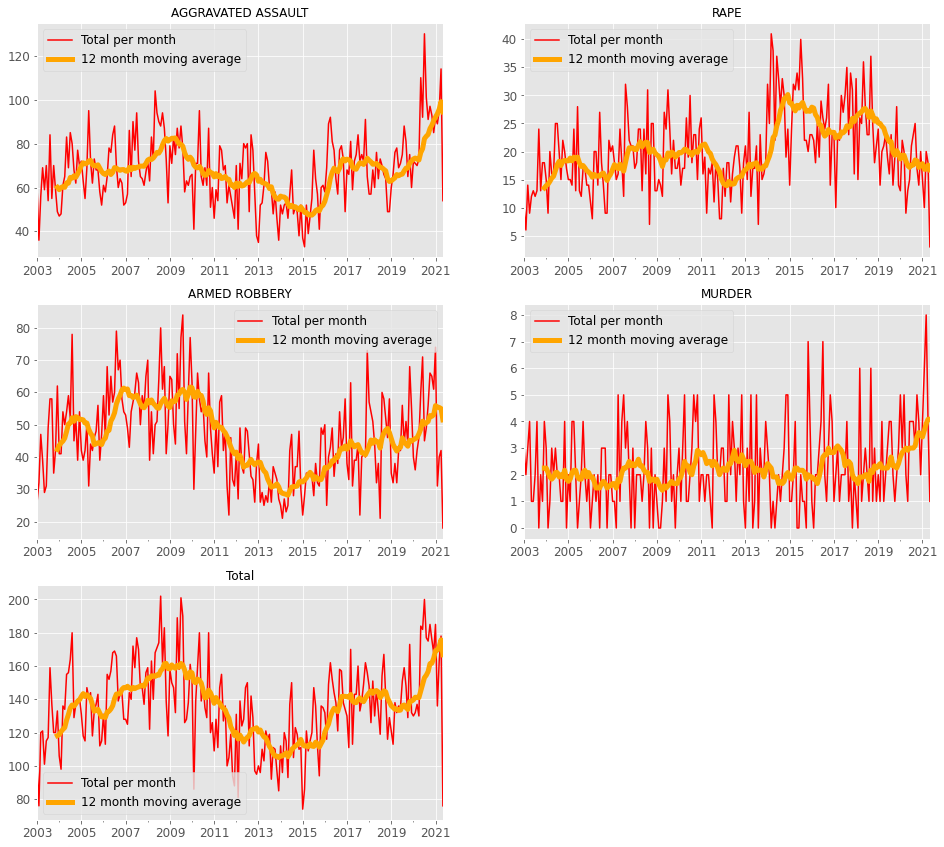

In [17]:
plt.title("Total Violent Crimes, 2003-Present")
plt.xticks(rotation="60")
sb.countplot(df_viol.highest_offense_description, data=df_viol)
plt.show()

display(df_viol.zip_code.value_counts(normalize=True).head(25))

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes for violent crime, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[0],
)
df_viol_mur.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zipcodes for murder, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.highest_offense_description)
mur_freq = pd.crosstab(df_viol_mur.zip_code, df_viol_mur.highest_offense_description)
display(viol_freq)

monthly_viol = pd.DataFrame(
    df_viol[df_viol["highest_offense_description"] == "AGGRAVATED ASSAULT"]
    .resample("M")
    .size()
)
monthly_viol.columns = ["AGGRAVATED ASSAULT"]

for i in df_viol["highest_offense_description"].unique():
    monthly_viol[i] = pd.DataFrame(
        df_viol[df_viol["highest_offense_description"] == i].resample("M").size()
    )

monthly_viol["Total"] = monthly_viol.sum(axis=1)

ViolCrimeTypes = monthly_viol.columns

plt.figure(1)
plt.figure(figsize=(16, 25))

i = 521
for eachCrime in ViolCrimeTypes:
    plt.subplot(i)
    monthly_viol[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly_viol[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1


viol_freq.to_csv("viol_freq.csv")
mur_freq.to_csv("mur_freq.csv")

Currently, 78741 shares 13.07% of violent crime, followed by 78753, sharing 9.92%.


### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

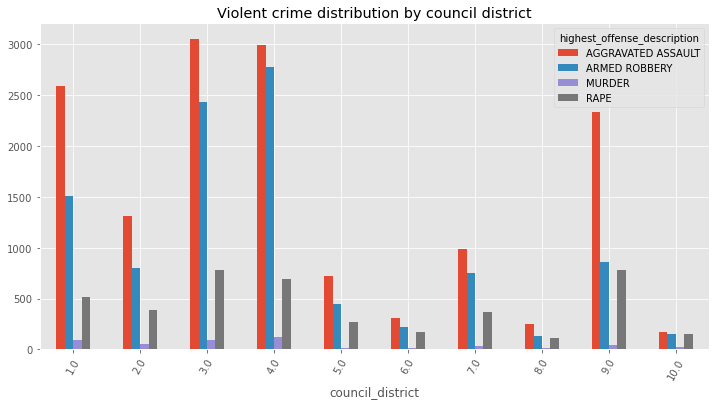

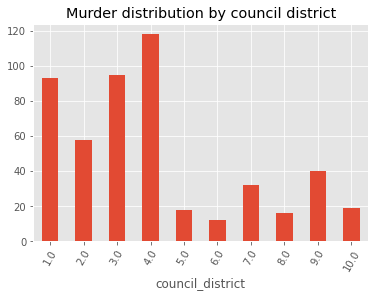

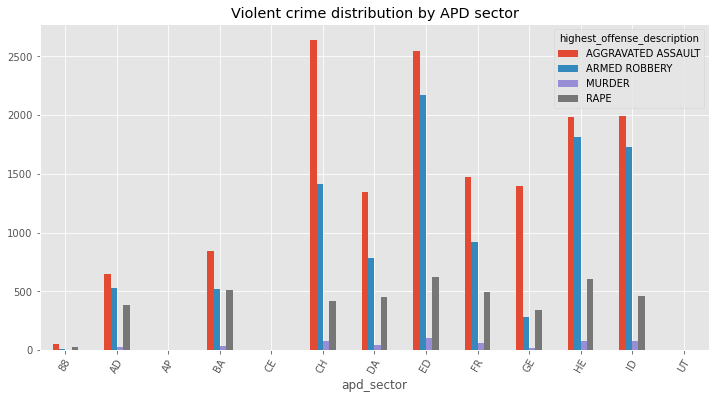

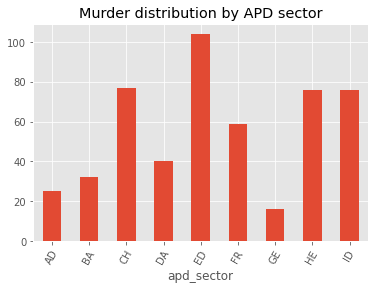

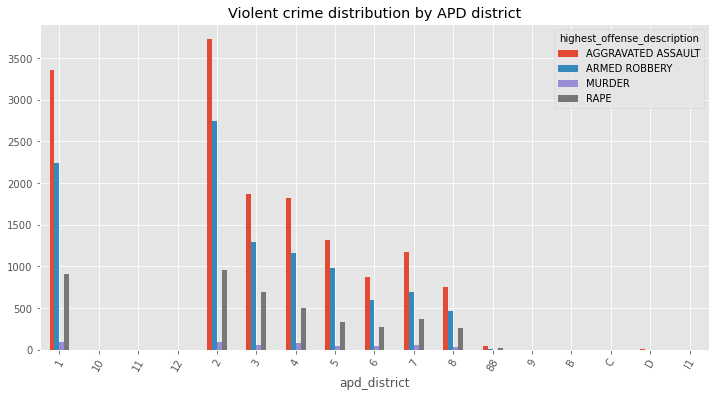

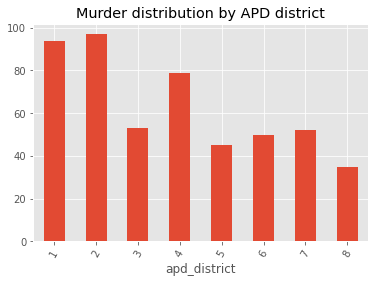

In [18]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(rot=60, title="Murder distribution by council district", legend=False)
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    rot=60, title="Murder distribution by APD sector", legend=False
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    rot=60, title="Murder distribution by APD district", legend=False
)
plt.show()

### K. Violent crime and murder distribution by location type

highest_offense_description,AGGRAVATED ASSAULT,ARMED ROBBERY,MURDER,RAPE
location_type,,,,
ABANDONED/CONDEMNED STRUCTURE,14,7,1,4
AMUSEMENT PARK,0,2,0,0
ARENA / STADIUM / FAIRGROUNDS / COLISEUM,2,0,0,0
ATM SEPARATE FROM BANK,1,3,0,0
AUTO DEALERSHIP NEW / USED,10,2,0,1
BANKS / SAVINGS & LOAN,5,134,1,1
BAR / NIGHT CLUB,673,46,10,79
CAMP / CAMPGROUND,24,2,0,3
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,21,5,1,7


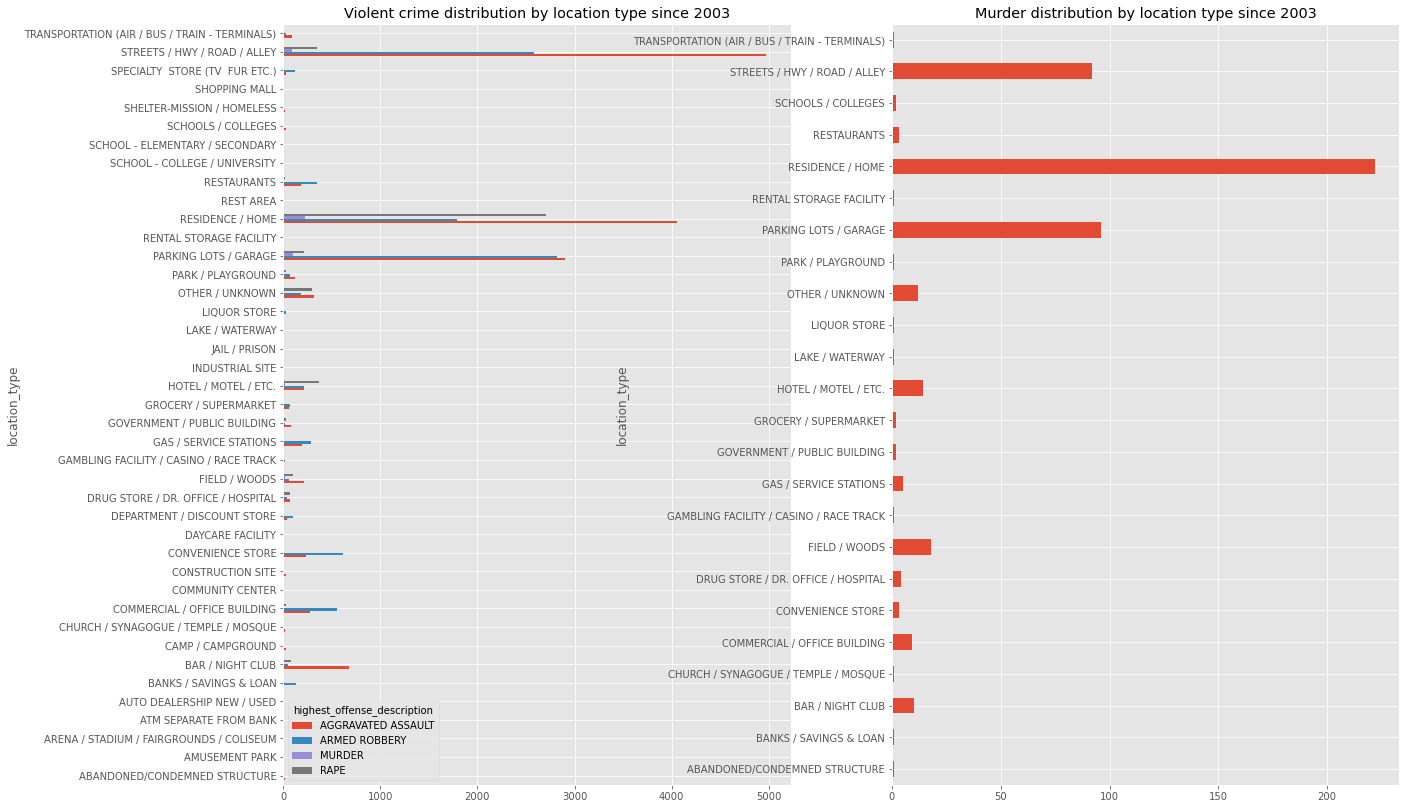

In [19]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)
mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

fig, axs = plt.subplots(figsize=(20, 14), ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003", ax=axs[0],
)
mur_loc.plot.barh(
    title="Murder distribution by location type since 2003", legend=False, ax=axs[1]
)
plt.show()


viol_loc.to_csv("viol_loc.csv")

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [20]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Armed robbery 

In [21]:
agg_robbery_coords_heat = df_agg_robbery[
    (df_agg_robbery["latitude"].isnull() == False)
    & (df_agg_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [22]:
mur_coords_heat = df_viol_mur[
    (df_viol_mur["latitude"].isnull() == False)
    & (df_viol_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [23]:
df.address.value_counts().head(50).to_frame()

,address
4110 GUADALUPE ST,11662
1030 NORWOOD PARK BLVD,9241
2901 S CAPITAL OF TEXAS HWY NB,8149
3600 PRESIDENTIAL BLVD,7400
500 E 7TH ST,6127
1000 E 41ST ST,5844
3708 S 2ND ST,5264
2508 E RIVERSIDE DR,4846
11200 LAKELINE MALL DR,4509
9300 S IH 35 SVRD SB,4089


In [24]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(13).to_frame()

,address
500 E 7TH ST,84
9515 N LAMAR BLVD,67
1700 BURTON DR,63
00 BLOCK UNKNOWN,59
6409 SPRINGDALE RD,59
9601 MIDDLE FISKVILLE RD,58
1071 CLAYTON LN,55
900 BLOCK E 32ND ST,55
9200 NORTH PLZ,53
1030 NORWOOD PARK BLVD,53


In [25]:
# Show addresses with 2 or more reported murders
df_viol_mur.address.value_counts().head(30).to_frame()

,address
4700 E RIVERSIDE DR,3
8610 N LAMAR BLVD,3
6407 SPRINGDALE RD,3
8800 N IH 35 SVRD SB,3
6409 SPRINGDALE RD,3
9601 MIDDLE FISKVILLE RD,2
6600 ED BLUESTEIN BLVD SB,2
11105 N IH 35 SVRD NB,2
1050 SPRINGDALE RD,2
2915 S IH 35 SVRD NB,2


In [26]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")
df_21.to_csv("df_21.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")
df_viol_21.to_csv("df_viol_21.csv")

df_viol_mur_17.to_csv("df_viol_mur_17.csv")
df_viol_mur_18.to_csv("df_viol_mur_18.csv")
df_viol_mur_19.to_csv("df_viol_mur_19.csv")
df_viol_mur_20.to_csv("df_viol_mur_20.csv")
df_viol_mur_21.to_csv("df_viol_mur_21.csv")

df_viol.to_csv("df_viol.csv")
df_viol_mur.to_csv("df_viol_mur.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")